In [7]:
# python library
import os, time, datetime, random, math

# warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.style.use('ggplot')

# missingno
import missingno


In [3]:
# load datset
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')
sample_sub = pd.read_csv('datasets/sample_submission.csv')

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


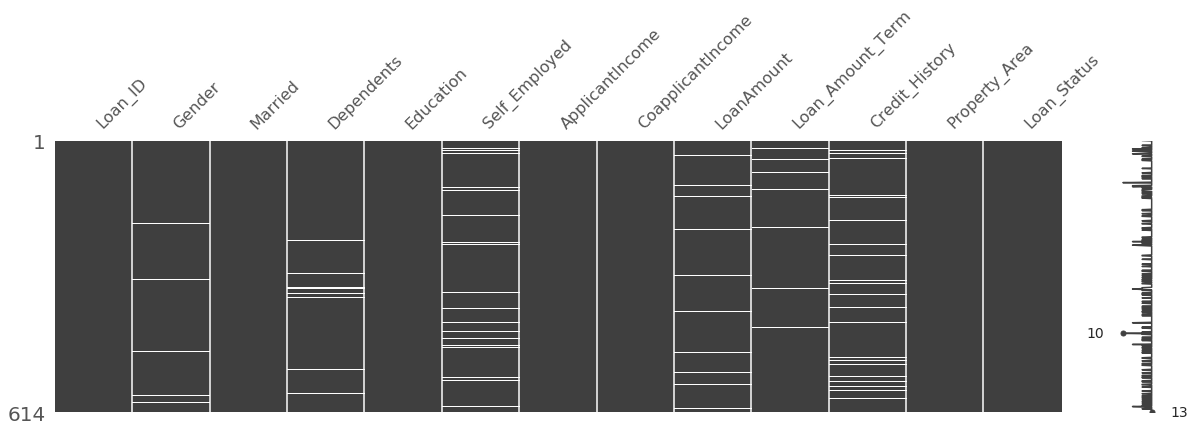

In [8]:
missingno.matrix(train_data, figsize=(20,5))

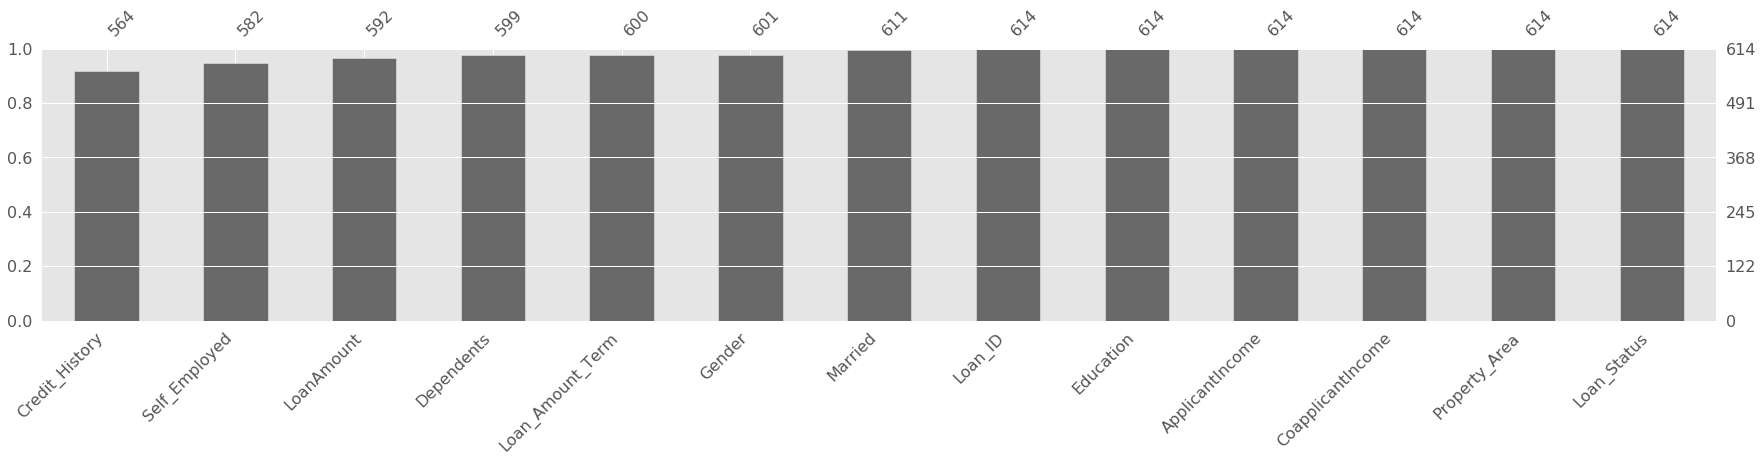

In [11]:
missingno.bar(train_data, sort = 'ascending', figsize = (30,5));

In [12]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
train_data.drop('Loan_ID', inplace = True, axis = 1)

In [17]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
data_bin = pd.DataFrame() # discrete variable
data_con = pd.DataFrame() # continuous variable

In [20]:
train_data.shape

(614, 12)

In [21]:
# join train and test data
data_raw = train_data.append(test_data)
data_raw.reset_index(inplace = True)
data_raw.drop('index', inplace = True, axis = 1)

In [22]:
data_raw.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,NaN,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,NaN,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,NaN,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,NaN,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,NaN,Y,No,Urban,No


In [23]:
data_raw.drop('Loan_ID', inplace = True, axis = 1)

In [24]:
data_raw.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,Y,No,Urban,No


In [25]:
data_raw.describe(include=['O'])

,Dependents,Education,Gender,Loan_Status,Married,Property_Area,Self_Employed
count,956,981,957,614,978,981,926
unique,4,2,2,2,2,3,2
top,0,Graduate,Male,Y,Yes,Semiurban,No
freq,545,763,775,422,631,349,807


In [26]:
# Feature: target variable Loan_Status
data_raw.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

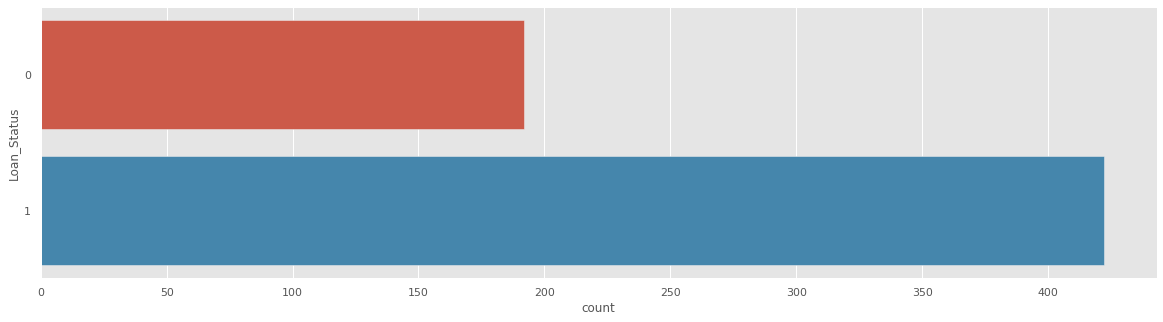

In [28]:
data_raw.loc[data_raw['Loan_Status'] == 'Y', 'Loan_Status'] = 1
data_raw.loc[data_raw['Loan_Status'] == 'N', 'Loan_Status'] = 0

data_bin['Loan_Status'] = data_raw['Loan_Status']
data_con['Loan_Status'] = data_raw['Loan_Status']

fig = plt.figure(figsize = (20,5))
sns.countplot(y="Loan_Status", data = data_bin);

In [29]:
data_raw.shape

(981, 12)

In [30]:
data_raw.Gender.value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [32]:
data_raw.Gender.isnull().sum()

24

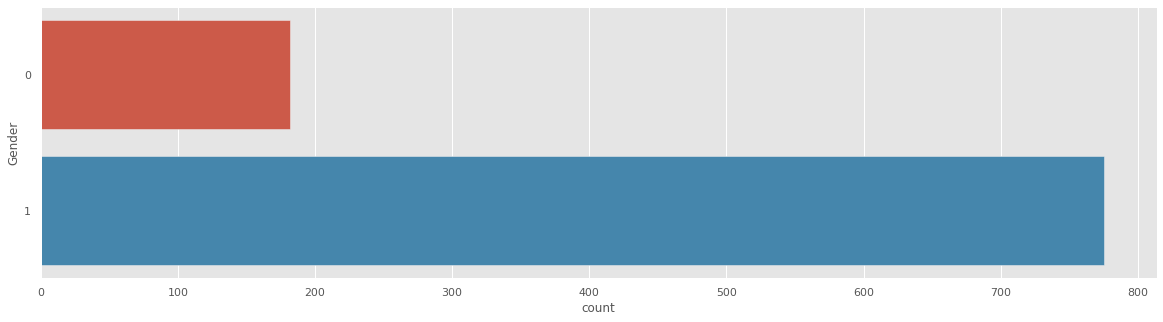

In [33]:
data_raw.loc[data_raw['Gender'] == 'Male', 'Gender'] = 1
data_raw.loc[data_raw['Gender'] == 'Female', 'Gender'] = 0

data_bin['Gender'] = data_raw['Gender']
data_con['Gender'] = data_raw['Gender']

fig = plt.figure(figsize = (20,  5))
sns.countplot(y = "Gender", data = data_bin);

In [34]:
data_raw.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [35]:
data_raw.Married.isnull().sum()

3

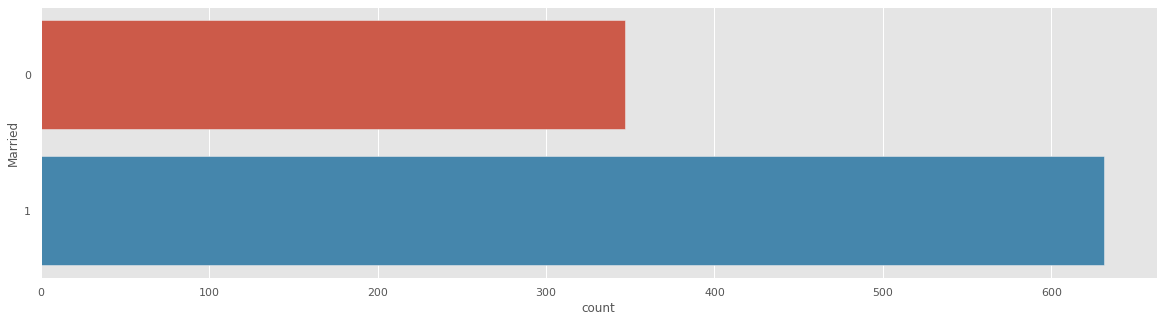

In [36]:
data_raw.loc[data_raw['Married'] == 'Yes', 'Married'] = 1
data_raw.loc[data_raw['Married'] == 'No', 'Married'] = 0

data_bin['Married'] = data_raw['Married']
data_con['Married'] = data_raw['Married']

fig = plt.figure(figsize = (20,  5))
sns.countplot(y = "Married", data = data_bin);

In [37]:
data_raw.Education.value_counts()

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

In [38]:
data_raw.Education.isnull().sum()

0

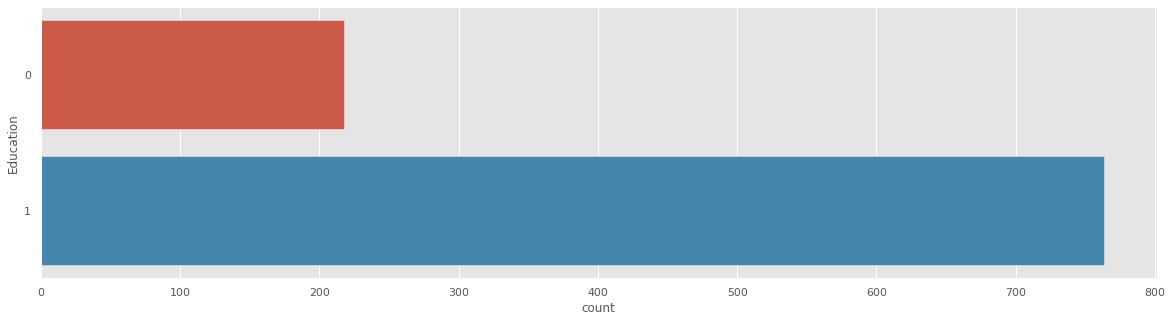

In [39]:
data_raw.loc[data_raw['Education'] == 'Graduate', 'Education'] = 1
data_raw.loc[data_raw['Education'] == 'Not Graduate', 'Education'] = 0

data_bin['Education'] = data_raw['Education']
data_con['Education'] = data_raw['Education']

fig = plt.figure(figsize = (20,  5))
sns.countplot(y = "Education", data = data_bin);

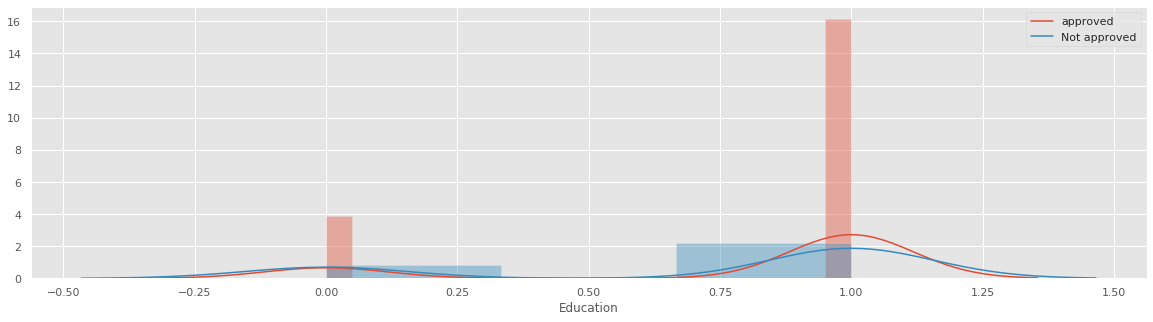

In [40]:
fig = plt.figure(figsize = (20,5))
sns.distplot(data_bin.loc[data_bin['Loan_Status']== 1]['Education'], kde_kws = {'label': 'approved'});
sns.distplot(data_bin.loc[data_bin['Loan_Status']== 0]['Education'], kde_kws = {'label': 'Not approved'});

In [41]:
data_raw.Dependents.value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

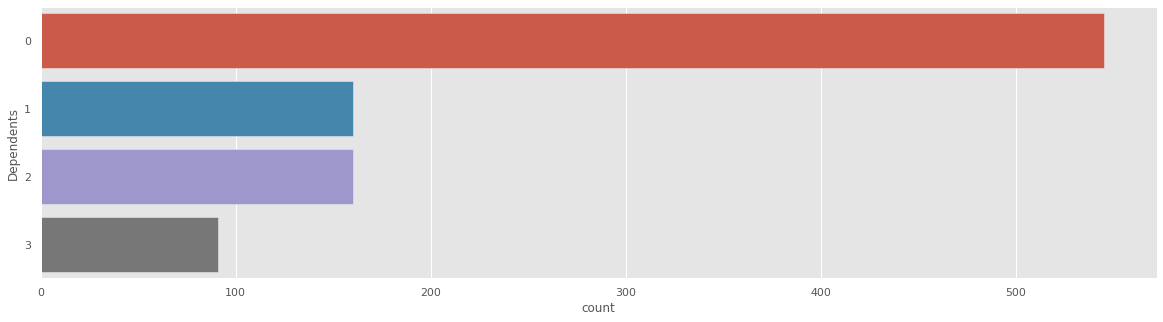

In [43]:
data_raw.loc[data_raw["Dependents"] == "3+", "Dependents"] = 3

data_bin["Dependents"] = data_raw["Dependents"]
data_con["Dependents"] = data_raw["Dependents"]

fig = plt.figure(figsize = (20,5))
sns.countplot(y = "Dependents", data = data_bin);


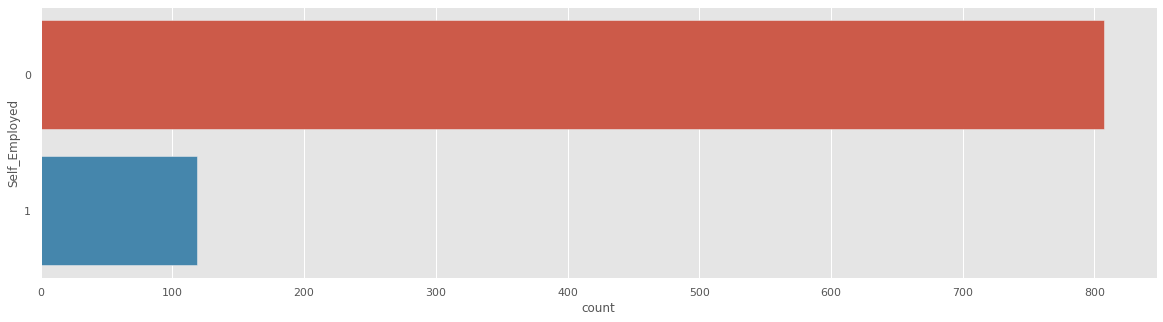

In [44]:
data_raw.loc[data_raw['Self_Employed'] == 'Yes', 'Self_Employed'] = 1
data_raw.loc[data_raw['Self_Employed'] == 'No', 'Self_Employed'] = 0

data_bin['Self_Employed'] = data_raw['Self_Employed']
data_con['Self_Employed'] = data_raw['Self_Employed']

fig = plt.figure(figsize = (20,  5))
sns.countplot(y = 'Self_Employed', data = data_bin);

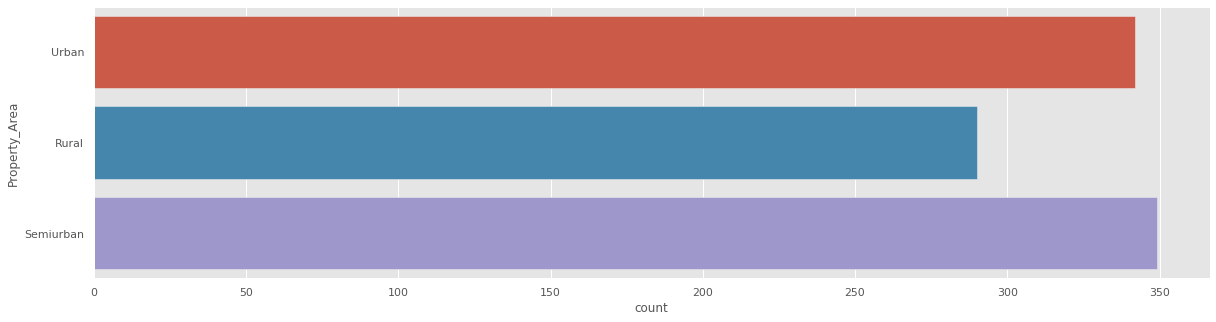

In [46]:
fig = plt.figure(figsize = (20,5))
sns.countplot(y="Property_Area", data = data_raw);

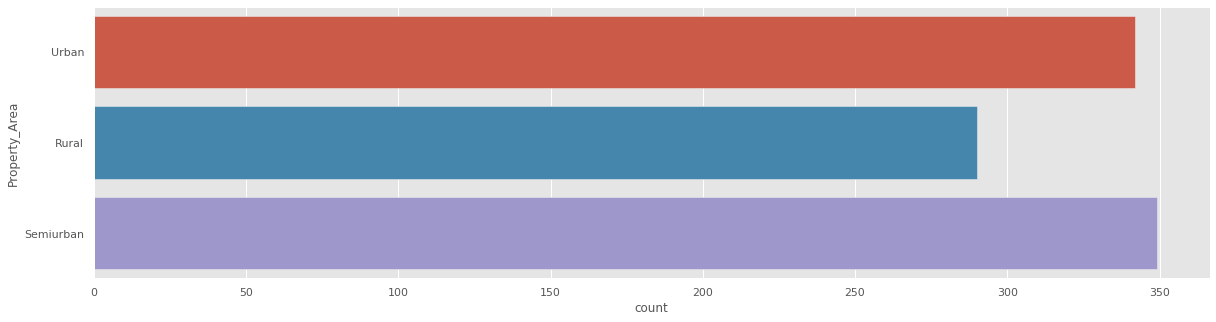

In [47]:
data_bin["Property_Area"] = data_raw["Property_Area"]
data_con["Property_Area"] = data_raw["Property_Area"]

fig = plt.figure(figsize = (20,5))
sns.countplot(y="Property_Area", data = data_bin);

In [48]:
data_raw.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,Education,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,981.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,0.777778,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,0.415952,77.421743,65.100602
min,0.000000,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,1.000000,700.000000,480.000000


In [49]:
data_raw.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education              int64
Gender                object
LoanAmount           float64
Loan_Amount_Term     float64
Loan_Status           object
Married               object
Property_Area         object
Self_Employed         object
dtype: object

In [53]:
data_raw.ApplicantIncome.value_counts()

2500     13
5000     11
3333     10
3500      9
2600      8
4583      7
4333      7
10000     6
2400      6
6000      6
4000      6
4166      6
3750      5
6250      5
8333      5
2333      4
6500      4
3166      4
2583      4
3417      4
7500      4
3400      4
4283      3
5333      3
5417      3
3000      3
3510      3
3859      3
4750      3
3083      3
         ..
6782      1
3707      1
3704      1
2679      1
6700      1
12876     1
4723      1
4452      1
2699      1
12941     1
3727      1
13083     1
5800      1
5829      1
5124      1
3748      1
4521      1
674       1
2720      1
3854      1
2718      1
2717      1
1141      1
3508      1
15000     1
14999     1
4758      1
4755      1
4364      1
3691      1
Name: ApplicantIncome, Length: 752, dtype: int64

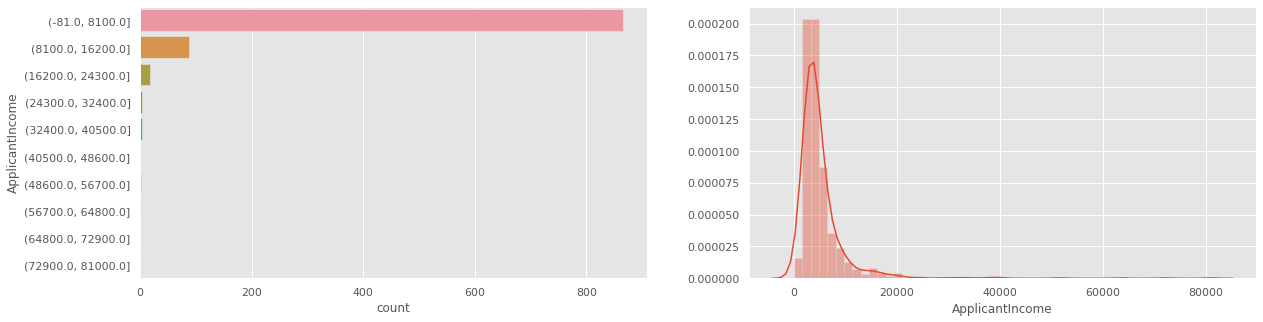

In [56]:
data_bin["ApplicantIncome"] = pd.cut(data_raw["ApplicantIncome"], 10)
data_con["ApplicantIncome"] = data_raw["ApplicantIncome"]

fig = plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(y = "ApplicantIncome", data = data_bin);
plt.subplot(1,2,2)
sns.distplot(data_con["ApplicantIncome"]);

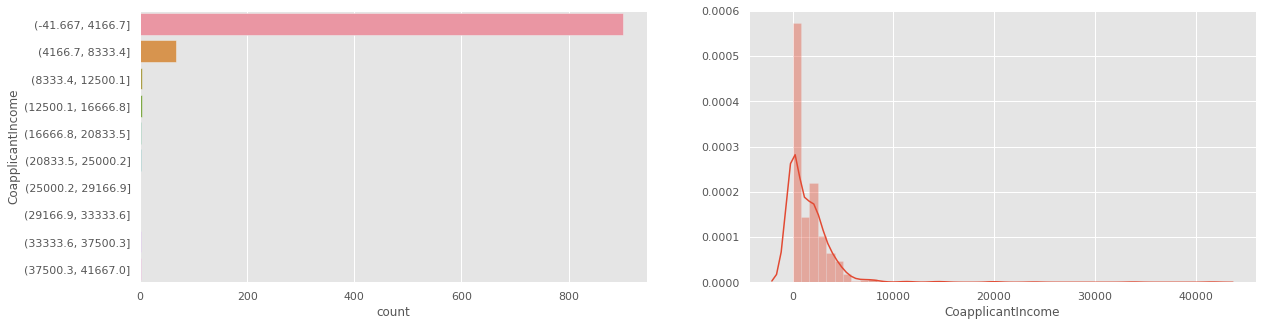

In [57]:
data_bin["CoapplicantIncome"] = pd.cut(data_raw["CoapplicantIncome"], 10)
data_con["CoapplicantIncome"] = data_raw["CoapplicantIncome"]

fig = plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(y = "CoapplicantIncome", data = data_bin);
plt.subplot(1,2,2)
sns.distplot(data_con["CoapplicantIncome"]);

In [58]:
data_raw.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

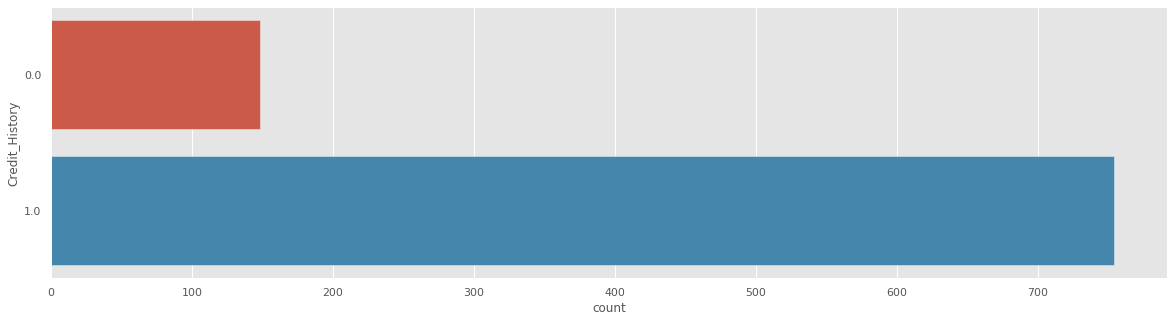

In [60]:
data_raw.loc[data_raw["Credit_History"] == '1.0', "Credit_History"] = 1
data_raw.loc[data_raw["Credit_History"] == '0.0', "Credit_History"] = 0

data_bin["Credit_History"] = data_raw["Credit_History"]
data_con["Credit_History"] = data_raw["Credit_History"]

plt.figure(figsize = (20,5))
sns.countplot(y = "Credit_History", data = data_bin);